In [1]:
# Tutorial 3, Analysis of prefrontal cortex data
import numpy as np
import math
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 8)
plt.rcParams["font.size"] = 14
from scipy.sparse import coo_matrix
import numpy.matlib
from numpy import linalg as LA

#import data
data1=np.loadtxt('Dati_181014_maze.txt')
datatask=data1.astype(int)
data2=np.loadtxt('Dati_181014_sleep1.txt')
datapre=data2.astype(int)
data3=np.loadtxt('Dati_181014_sleep2.txt')
datapost=data3.astype(int)

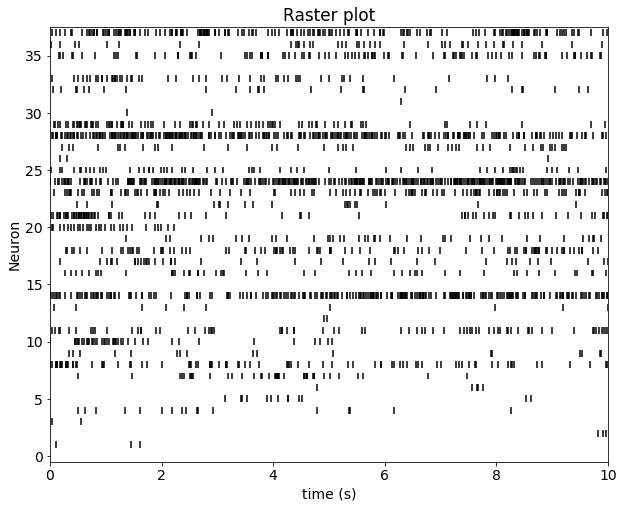

In [2]:
#Question 1: Raster Plot
raster=data1
tmin=np.min(raster[:,0])
tmax=np.max(raster[:,0])
plt.xlim([0,10])
plt.ylim([-0.5,37.5])
plt.vlines((raster[:,0]-tmin)/10000,raster[:,1]-0.3,raster[:,1]+0.3)
plt.xlabel('time (s)')
plt.ylabel('Neuron')
plt.title('Raster plot')
#plt.savefig('raster_task_dt01t1sec.pdf')
plt.show()


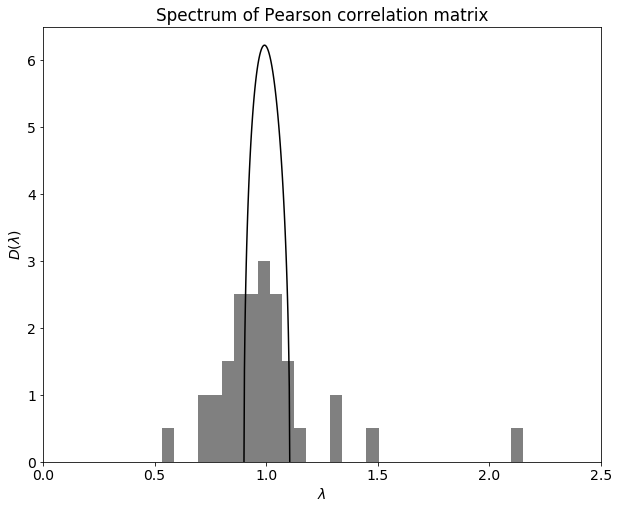

Number of eigenvalues > lp:  6


In [3]:
#Question 2: Pearson matrix

#Pearson matrix
def Zscore(data):
    #time bin (in units of 0.1ms)
    dt=1000
    L=np.amax(data[:,1])
    Tmin=np.amin(data[:,0])
    Tmax=np.amax(data[:,0])
    T=Tmax-Tmin
    M=(T//dt)+1
    s=np.zeros((M,L),dtype=np.int)
    for k in range(len(data)):
        s[(data[k,0]-Tmin)//dt,data[k,1]-1]+=1
    #Alternative way, using sparse matrices
    #x=(data[:,0]-Tmin)//dt
    #y=data[:,1]-1
    #z=np.ones(np.size(data,0))
    #st=coo_matrix((z,(x,y)),dtype=np.int8,shape=(B,N))    
    #s=np.asarray(st)
    p=np.mean(s, axis=0, dtype=np.float64)
    sigma=np.sqrt(np.var(s, axis=0, dtype=np.float64, ddof=1))
    y=(s-p)/sigma
    return y.astype(np.float64)

#compute Pearson matrix for data and diagonalize it
Y=Zscore(datatask)
C=np.dot(Y.T,Y)/np.size(Y,0)
w, v = LA.eig(C)

#plot eigenvalue distribution
r=np.size(Y,1)/np.size(Y,0)
lp=(1+np.sqrt(r))**2
lm=(1-np.sqrt(r))**2
x=np.zeros((2,101))
for i in range(101):
    t=lm+(lp-lm)*i/100
    x[0,i]=t
    x[1,i]=np.sqrt((lp-t)*(t-lm))/(t*r)/(2*math.pi)
plt.hist(w, bins=30, normed=True, facecolor='grey')
plt.plot(x[0,:],x[1,:],'black')
plt.xlim([0,2.5])
plt.ylim([0,6.5])
plt.xlabel('$\lambda$')
plt.ylabel('$D(\lambda)$')
plt.title('Spectrum of Pearson correlation matrix')
#plt.savefig('PCA-task.pdf')
plt.show()


print('Number of eigenvalues > lp: ',len(np.where(w>lp)[0]))